## Librerias

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

Considere un lanzamiento de tiro parabolico, cuya ecuación de trayectoria esta dada por:

$$
  y(x) = y_0 + (x-x_0) \tan{\theta} - \frac{1}{2}g(\frac{x-x_0}{v_0\cos{\theta}})^2
$$

Usando $x_0 = 0$, $v_0 = 14 \text{ m/s}$, $\theta = \pi / 4$, $y_0 = 2 \text{ m}$, $g = 9.8 \text{m/s}$

La idea es gráficar la trayectoria hasta $x= 30 \text{ m}$. Para ello siga los siguientes pasos.

a) Cree una variable del tipo numpy array `x`, que corresponde a 100 puntos entre (0, **30**), use el siguiente [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/01%20-%20numpy.ipynb) como guia. 



In [8]:
## tu codigo aqui
x = np.linspace(0,30,100)

b) Calcule $y(x)$ que corresponde a $y$ para los 100 puntos anteriores. Guarde el valor en la variable del tipo numpy array `y`. No es posible usar ciclos como while o for, use las funciones de numpy como `np.tan`

In [9]:
## tu codigo aqui
y = np. array(2 + x*(np.tan(np.pi/4)) - (1/2)*(9.8)*(x/(14*np.cos(np.pi/4)))**2)

c) Use `matplotlib`, para gráficar $y(x)$. Ponerle etiquetas a los ejes con unidades.

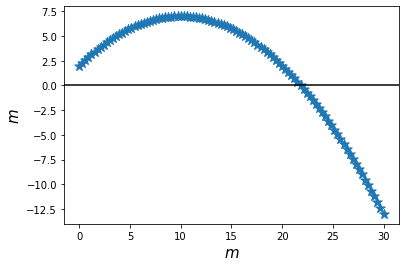

In [16]:
## tu codigo aqui
plt.scatter(x,y,marker='*',s=100)
plt.xlabel(r'$m$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.axhline(color='k',ls='-')

## Problema 2

A partir del conjunto de entrenamiento de los datos MNIST (imágenes de números escritos a mano) en este problema vamos a operar imagenes de pixeles. Use este [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/01%20-%20numpy.ipynb) como referencia.

 


In [17]:
# Download the dataset
# no modificar este codigo
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Primero mostramos dos ejemplos de las imagenes con indices 17 y 9

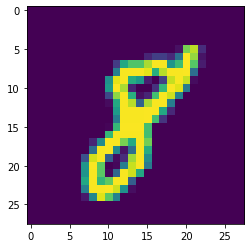

In [18]:
# no modificar este codigo 

eight_image = X_train[17]

plt.imshow(eight_image)

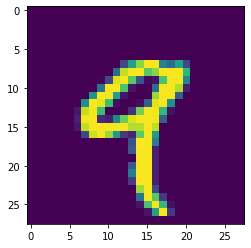

In [19]:
# no modificar este codigo 

nine_image =  X_train[4]
plt.imshow(nine_image)

z) Imprima la forma de las matrices que corresponden a las dos imagenes, use el atributo shape.

In [20]:
## tu codigo aqui
print(np.shape(eight_image),np.shape(nine_image))

(28, 28) (28, 28)


a) Grafique la imagen que resulta de sumar las dos imagenes

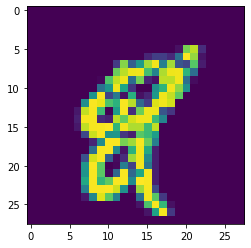

In [21]:
# tu codigo aqui
suma_matrices=eight_image+nine_image
plt.imshow(suma_matrices)

b) Grafique la imagen que resulta de restar la imagen del ocho con la imagen del nueve.

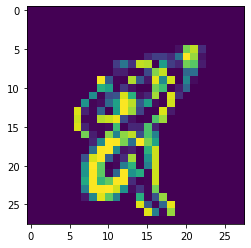

In [22]:
# tu codigo aqui
resta_matrices=eight_image-nine_image
plt.imshow(resta_matrices)


c) Grafique la imagen que resulta de multiplicar pixel por pixel las dos imagenes.

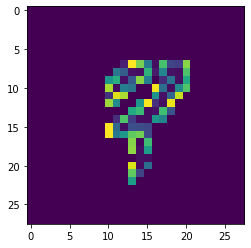

In [23]:
# tu codigo aqui
multi_matrices=eight_image*nine_image
plt.imshow(multi_matrices)


d) Grafique la imagen que resulta de hacer un producto matricial entre la imagen del 8 a la izquierda y la imagen del 9 a la derecha.

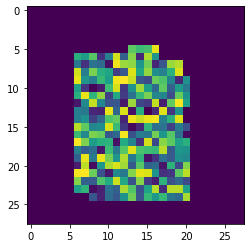

In [24]:
# tu codigo aqui
cruz_matrices=np.dot(eight_image,nine_image)
plt.imshow(cruz_matrices)

e) Cómo interpreta las imagenes de producto elemento por elemento y producto matricial ?



El producto elemento a elemento gráficamente se logra observar como una mueva de la imagen nueva reescrita con las dimensiones correspondientes a la matriz de la imagen ocho. En cambio, el producto cruz o producto matricial se observa directamente la multiplicación entre las filas y las columnas de las matrices respectivamente.



f) Para la imagen del ocho, I) calcule con una función de numpy, el entero que corresponde a la suma total de pixeles. II) un array de 28 componentes que corresponde a la suma de pixeles de cada fila. III) Un array de 28 componentes que corresponde a la columnna 17 del numero 8.

In [25]:
## parte I codigo aqui

suma_total = eight_image.sum()

## parte II codigo aqui

suma_pixeles_filas = eight_image.sum(axis = 1)

## parte III codigo aqui

select_col = np.array(eight_image[:,16])

print(suma_total, suma_pixeles_filas, select_col)

27106 [   0    0    0    0    0  475  727 2068 2356 1717 1451 1498 1561 1590
 1340 1115 1361 1468 1238 1270 1285 1308 1350 1246  682    0    0    0] [  0   0   0   0   0   0  47 253 161   0  36 178 253 253 179   0   0   0
   0   0   0   0   0   0   0   0   0   0]


g) Seleccione del conjunto de datos `X_train`, todas las imagenes que corresponden a imagenes del numero 8. Imprima la forma de la matriz resultante (tensor) de todas las imagenes de 8.

In [27]:
## tu codigo aqui
ochos = []
for i in range(len(y_train)):
  if y_train[i] == 8:
    imagen=X_train[i,:,:]
    ochos.append(imagen)

print(ochos)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



h) Grafique la imagen promedio de todos los ochos. Guarde la imagen en la variable `eight_prom`.

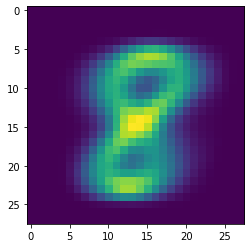

In [29]:
## tu codigo aqui
eight_prom=np.mean(ochos,axis=0)
plt.imshow(eight_prom)

h) Grafique la imagen del peor ocho comparado con la imagen `eight_prom`, basados en la metrica, distancia euclidiana dada por, 

$$E_d(\vec{p}, \vec{q}) = \sqrt{\sum_{i=1}^n(q_i-p_i)^2}$$

Donde $\vec{p}$, $\vec{q}$ son dos vectores que pertenecen a un espacio de $n$ dimensiones. En nuestro caso $n=784 = 28\times28$.

Es decir grafique la imagen del numero ocho que tiene la mayor distancia euclidiana comparado con el ocho promedio. 


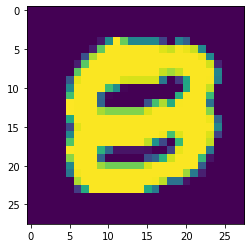

In [30]:
## tu codigo aqui
mayor=0
final=None

for i in ochos:
  e_d = np.sqrt(np.sum(np.square(i-eight_prom)))
  if mayor < e_d:
    mayor=e_d
    final=i

plt.imshow(final)
